In [1]:
import sys
import pandas as pd
import datetime as dt
import time
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from pymongo import MongoClient
from tqdm import tqdm

sys.path.append('..')

from pseudoFrameWork.api import getAnyMOEX

mongoClient = MongoClient('localhost', 27017, username='admin', password='admin')
db = mongoClient['rlab_db']

TODAY = dt.datetime.today()
DATE_FORMAT = '%Y-%m-%d'
DATA_LOAD_LIMIT = 100

db.list_collection_names()

['q1.CBGoldQuotes',
 'q1.futuresQuotes',
 'q1.RGBIQuotes',
 'futuresList',
 'q1.RUCBTRNSQuotes',
 'q1.futuresQuotesContinuous',
 'q1.IMOEXQuotes']

In [2]:
def insertToDB(name, data, dataBase): dataBase[name].insert_many([data.iloc[i].to_dict() for i in range(data.shape[0])])


#### Question 1
Diversification of portfolio by Futures

Period = (2019-12-01, 2025-09-30)

Basic Portfolio:
- Gold
- IMOEX
- RGBI
- IFX (или RUCBTRNS? Пока нет возможности выгрузить IFX)

In [3]:
PERIOD = (dt.datetime(2019, 12, 1), dt.datetime(2025, 9, 30))

## Gold

# goldCB = pd.read_html('https://www.cbr.ru/hd_base/metall/metall_base_new/?UniDbQuery.Posted=True&UniDbQuery.From=01.12.2019&UniDbQuery.To=30.09.2025&UniDbQuery.Gold=true&UniDbQuery.so=1')
# goldCB = goldCB[0]
# goldCB.columns = ['date', 'price']
# goldCB['date'] = pd.to_datetime(goldCB['date'], dayfirst=True)
# goldCB['price'] = goldCB['price'].str.replace(',', '.', regex=True).replace(' ', '', regex=True).astype(float)
# insertToDB('q1.CBGoldQuotes', goldCB, db)

## IMOEX, RGBI, RUCBTRNS

# MOEXIndex = ('RUCBTRNS')
# MOEXIndex = ('IMOEX', 'RGBI', 'RUCBTRNS')

# for idx in tqdm(MOEXIndex):
#     numPeriods = math.ceil((PERIOD[1] - PERIOD[0]).days / DATA_LOAD_LIMIT)
#     periods = [(PERIOD[0] + pd.offsets.Day(DATA_LOAD_LIMIT * period)).strftime(DATE_FORMAT) for period in range(numPeriods)]
#     periods.append(PERIOD[1].strftime(DATE_FORMAT))

#     for j in range(len(periods) - 1):
#         loopData = await getAnyMOEX(
#             api_method=rf'/iss/history/engines/stock/markets/index/sessions/total/securities/{idx}.json',
#             arguments={'from': periods[j], 'till': periods[j+1]},
#             field='history'
#         )

#         insertToDB(f'q1.{idx}Quotes', loopData, db)

## Futures (BR, Si, Eu, SUGR, RUON)

# futuresQ1 = (
#     'BRZ0', 'BRZ1', 'BRZ2', 'BRZ3', 'BRZ4', 'BRZ5',
#     'SiU1', 'SiM2', 'SiM4', 'SiM6',
#     'EuH1', 'EuM2', 'EuZ3', 'EuM5', 'EuZ6',
#     'SAH0', 'SAK0', 'SAV0', 'SAK1', 'SAV1', 'SAK2', 'SAV2', 'SAH3SAK3', 'SAN3', 'SAH4', 'SAN4', 'SAH5', 'SAN5', 'SAH6',
#     'RRX0', 'RRV1', 'RRU2', 'RRJ3', 'RRH4', 'RRG5', 'RRF6'
# )

# futuresList = pd.DataFrame(db['futuresList'].find())

# for ticker in tqdm(futuresQ1):
#     info = futuresList[futuresList['secid'] == ticker]

#     numPeriods = math.ceil(
#         (dt.datetime.strptime(info.iloc[0].expiration_date, DATE_FORMAT) - dt.datetime.strptime(info.iloc[0].start_date, DATE_FORMAT)).days / DATA_LOAD_LIMIT
#     )

#     periods = [
#         (dt.datetime.strptime(info.iloc[0].start_date, DATE_FORMAT) + pd.offsets.Day(DATA_LOAD_LIMIT * period)).strftime(DATE_FORMAT) for period in range(numPeriods)
#     ]
    
#     periods.append(info.iloc[0].expiration_date)

#     for j in range(len(periods) - 1):
#         loopData = await getAnyMOEX(
#             api_method=rf'/iss/history/engines/futures/markets/forts/boards/rfud/securities/{ticker}.json',
#             arguments={'from': periods[j], 'till': periods[j+1]},
#             field='history'
#         )

#         if loopData.empty: continue

#         else: db['q1.futuresQuotes'].insert_many([loopData.iloc[row].to_dict() for row in range(loopData.shape[0])])

# futuresQuotes = pd.DataFrame(db['q1.futuresQuotes'].find())

# mappingTickers = {
#     'BR': 'BR',
#     'Si': 'Si',
#     'Eu': 'Eu',
#     'SUGR': 'SA',
#     'RUON': 'RR',
# }

# for futures in ('BR', 'Si', 'Eu', 'SUGR', 'RUON'):
#     futuresQuotesContinuous = futuresQuotes[futuresQuotes['SECID'].str.contains(mappingTickers.get(futures))]['TRADEDATE'].sort_values()
#     futuresQuotesContinuous = futuresQuotesContinuous.to_frame()

#     for ticker in futuresQuotes[futuresQuotes['SECID'].str.contains(mappingTickers.get(futures))]['SECID'].unique():
#         futuresQuotesContinuous = futuresQuotesContinuous.merge(
#             futuresQuotes[futuresQuotes['SECID'] == ticker][['TRADEDATE', 'CLOSE']].rename(columns={'CLOSE': ticker}),
#             on='TRADEDATE',
#             how='left'
#         )

#     futuresQuotesContinuous['price'] = np.nan
#     columns = futuresQuotesContinuous.columns.tolist()
#     columns.remove('TRADEDATE')

#     for col in columns:
#         futuresQuotesContinuous['price'] = futuresQuotesContinuous['price'].combine_first(futuresQuotesContinuous[col])
    
#     futuresQuotesContinuous['ticker'] = futures    
    
#     insertToDB('q1.futuresQuotesContinuous', futuresQuotesContinuous[['ticker', 'TRADEDATE', 'price']], db)

futuresQuotes = pd.DataFrame(db['q1.futuresQuotesContinuous'].find())

Si = futuresQuotes[futuresQuotes['ticker'] == 'Si'][['TRADEDATE', 'price']].rename(columns={'price': 'Si'})
Si['Si'] = Si['Si'].bfill()

Eu = futuresQuotes[futuresQuotes['ticker'] == 'Eu'][['TRADEDATE', 'price']].rename(columns={'price': 'Eu'})
Eu['Eu'] = Eu['Eu'].bfill()

BR = futuresQuotes[futuresQuotes['ticker'] == 'BR'][['TRADEDATE', 'price']].rename(columns={'price': 'BR'})
BR['BR'] = BR['BR'].bfill()

Gold = pd.DataFrame(db['q1.CBGoldQuotes'].find()).astype({'date': str})[['date', 'price']].rename(columns={'date': 'TRADEDATE', 'price': 'Gold'})
IMOEX = pd.DataFrame(db['q1.IMOEXQuotes'].find())[['TRADEDATE', 'CLOSE']].rename(columns={'CLOSE': 'IMOEX'})
RGBI = pd.DataFrame(db['q1.RGBIQuotes'].find())[['TRADEDATE', 'CLOSE']].rename(columns={'CLOSE': 'RGBI'})
RUCBTRNS = pd.DataFrame(db['q1.RUCBTRNSQuotes'].find())[['TRADEDATE', 'CLOSE']].rename(columns={'CLOSE': 'RUCBTRNS'})

data = Si.merge(Eu, on='TRADEDATE', how='left')
data = data.merge(BR, on='TRADEDATE', how='left')
data = data.merge(Gold, on='TRADEDATE', how='left')
data = data.merge(IMOEX, on='TRADEDATE', how='left')
data = data.merge(RGBI, on='TRADEDATE', how='left')
data = data.merge(RUCBTRNS, on='TRADEDATE', how='left')
data.drop_duplicates(inplace=True)

data = data[(pd.to_datetime(data['TRADEDATE']) >= PERIOD[0]) & (pd.to_datetime(data['TRADEDATE']) <= PERIOD[1])]
data = data.bfill()

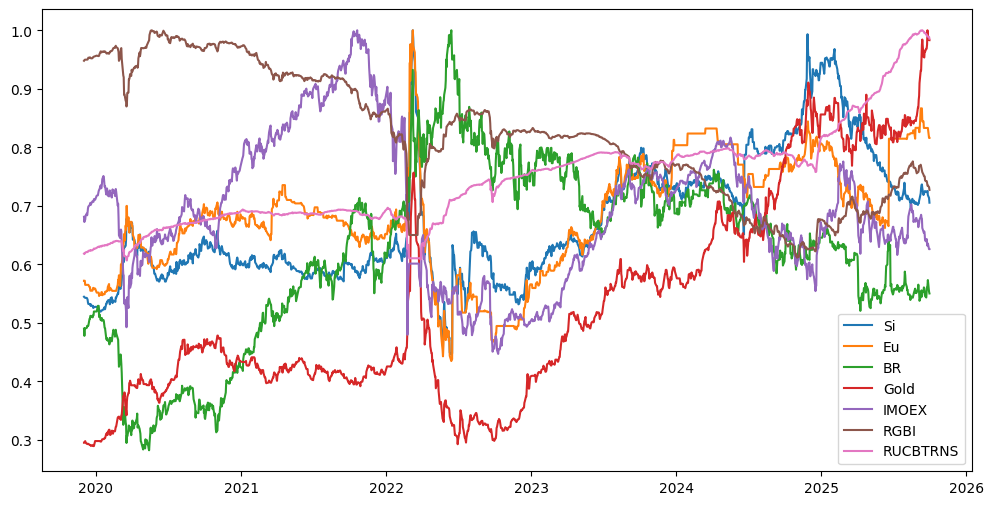

In [4]:
plt.figure(figsize=(12, 6))

vizual = data.copy()

cols = vizual.columns.to_list()
cols.remove('TRADEDATE')

for col in cols: 
    vizual[col] = vizual[col] / vizual[col].max()

    plt.plot(pd.to_datetime(vizual['TRADEDATE']), vizual[col], label=col)

plt.legend()
plt.show()


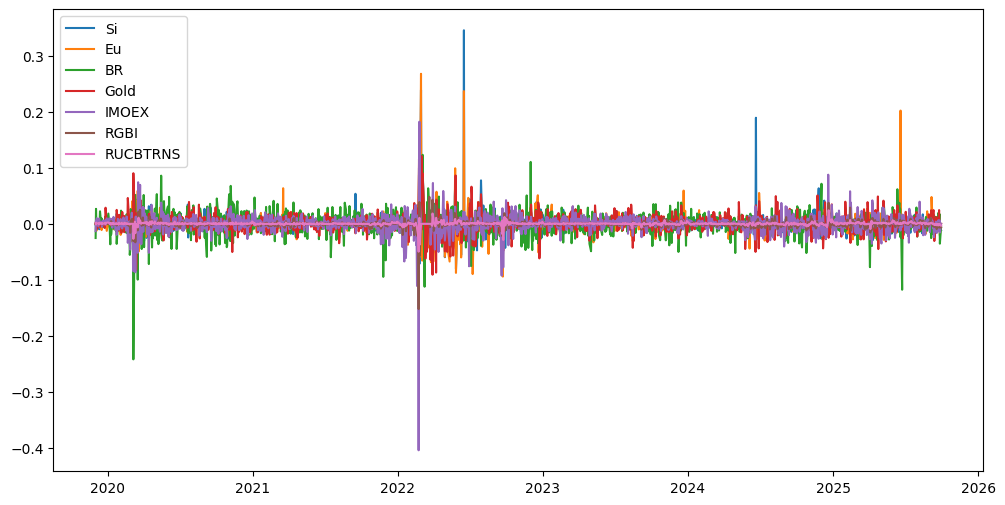

In [5]:
plt.figure(figsize=(12, 6))

vizual = data.copy()

cols = vizual.columns.to_list()
cols.remove('TRADEDATE')

for col in cols: 
    plt.plot(pd.to_datetime(vizual['TRADEDATE'])[:-1], np.diff(np.log(vizual[col])), label=col)

plt.legend()
plt.show()


In [ ]:
corr = pd.DataFrame()

for col in cols:
    corr[col] = np.diff(np.log(data[col]))

corr.corr().style.background_gradient(cmap='coolwarm')

,Si,Eu,BR,Gold,IMOEX,RGBI,RUCBTRNS
Si,1.000000,0.687638,-0.021737,0.190432,-0.134823,-0.097382,-0.067525
Eu,0.687638,1.000000,-0.016087,0.137476,-0.076663,-0.073434,-0.046123
BR,-0.021737,-0.016087,1.000000,0.074115,0.154383,0.068866,0.101110
Gold,0.190432,0.137476,0.074115,1.000000,-0.023498,-0.129772,-0.107975
IMOEX,-0.134823,-0.076663,0.154383,-0.023498,1.000000,0.612867,0.515231
RGBI,-0.097382,-0.073434,0.068866,-0.129772,0.612867,1.000000,0.770069
RUCBTRNS,-0.067525,-0.046123,0.101110,-0.107975,0.515231,0.770069,1.000000


In [ ]:
data[cols].corr().style.background_gradient(cmap='coolwarm')

,Si,Eu,BR,Gold,IMOEX,RGBI,RUCBTRNS
Si,1.000000,0.764320,0.119416,0.874128,-0.029660,-0.814568,0.561683
Eu,0.764320,1.000000,-0.081998,0.776722,0.349128,-0.545404,0.471379
BR,0.119416,-0.081998,1.000000,0.032732,-0.240676,-0.532609,0.229627
Gold,0.874128,0.776722,0.032732,1.000000,0.001244,-0.791359,0.792065
IMOEX,-0.029660,0.349128,-0.240676,0.001244,1.000000,0.203984,-0.134697
RGBI,-0.814568,-0.545404,-0.532609,-0.791359,0.203984,1.000000,-0.651689
RUCBTRNS,0.561683,0.471379,0.229627,0.792065,-0.134697,-0.651689,1.000000
